<a href="https://colab.research.google.com/github/Rohitdwivedi16111998/Analytics-Steps/blob/master/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [169]:
#importing all the required libraries and packages

from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile
import os
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import cv2
import tensorflow as tf
import keras


In [2]:
#kaggle Key to import data

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rsdwivedi","key":"26c02958520a7ff0624b928d1fc36058"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json 

In [4]:
#importing data using API
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 31.0MB/s]
100% 2.29G/2.29G [00:29<00:00, 82.4MB/s]


In [5]:
#extracting zip file downloaded from API

from zipfile import ZipFile
file_name = "chest-xray-pneumonia.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [141]:
#directories where training and testing images are present.
train_dir = '/content/chest_xray/train'
testing_dir = '/content/chest_xray/test'

**TRAINING IMAGES WITH LABELS**

In [171]:
X_train = []
y_train = []

In [172]:
os.chdir('/content/chest_xray/train/NORMAL')   #dir of normal images of training folder

In [188]:
#reading the normal images 

for i in tqdm(os.listdir()):
      img = cv2.imread(i) 
      img = cv2.resize(img,(256,256))  
      X_train.append(img)      #normal image
      y_train.append("Normal")  #Label = Normal

#total 1314 normal person X-rays

In [174]:
os.chdir('/content/chest_xray/train/PNEUMONIA')   #dir of pneumonia images of training folder

In [175]:
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(256,256))   
      X_train.append(img)             #pneumonia image
      y_train.append("PNEUMONIA")     #label = PNEUMONIA

#total 3875 pneumonia person X-rays

In [176]:
print(len(X_train))
print(len(y_train))

5216
5216


**Visualizing Normal X-Rays**

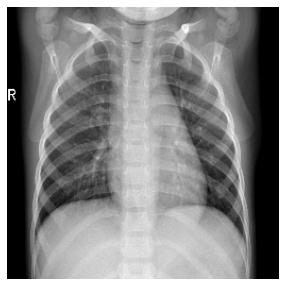

Normal


In [185]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[10], cmap="gray")
plt.axis('off')
plt.show()
print(y_train[10])

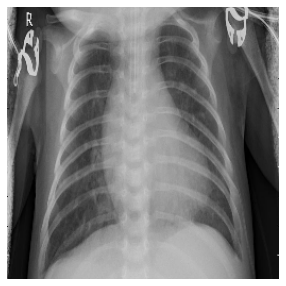

PNEUMONIA


In [193]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[4000], cmap="gray")
plt.axis('off')
plt.show()
print(y_train[4000])

**Model**

In [142]:
#defining vgg19 model
vgg19 = VGG19(input_shape=[224,224,3], weights='imagenet', include_top=False)

In [154]:
#We will not train the whole network.
for layer in vgg19.layers:
    layer.trainable = False

In [155]:
x = Flatten()(vgg19.output) #flatten layer
output = Dense(2, activation='softmax')(x) #output layer

In [156]:
model = Model(inputs=vgg19.input, outputs=output) #final model

In [157]:
#compiling model with loss function and optimizer

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

**DATA AUGMENTATION**

In [158]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,           #normalizing training images
                                   shear_range = 0.2,          #shear intensity
                                   zoom_range = 0.2,           #zoom in the images
                                   horizontal_flip = True)     #flipping images horizontally

test_datagen = ImageDataGenerator(rescale = 1./255)            #normalizing the testing images

In [165]:
train_data = train_datagen.flow_from_directory(train_dir,                      #target path (training)
                                                target_size = (224, 224),      #fitting data generator having image size (224,224)
                                                 batch_size = 32,              #batch size
                                                 class_mode = 'categorical')   #type of labels

Found 5216 images belonging to 2 classes.


In [166]:
test_data = test_datagen.flow_from_directory(testing_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


**MODEL TRAINING**

In [ ]:
history = model.fit(train_data,validation_data=test_data,epochs=10)  #fitting the model for training with validation data

Epoch 1/10
163/163 [==============================] - 105s 646ms/step - loss: 0.0903 - accuracy: 0.9686 - val_loss: 0.5087 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 105s 647ms/step - loss: 0.0641 - accuracy: 0.9755 - val_loss: 0.4044 - val_accuracy: 0.9022
Epoch 3/10
163/163 [==============================] - 106s 649ms/step - loss: 0.0738 - accuracy: 0.9734 - val_loss: 0.3371 - val_accuracy: 0.9103
Epoch 4/10
163/163 [==============================] - 106s 649ms/step - loss: 0.0831 - accuracy: 0.9709 - val_loss: 0.3811 - val_accuracy: 0.9038
Epoch 5/10
163/163 [==============================] - 105s 646ms/step - loss: 0.0764 - accuracy: 0.9711 - val_loss: 0.4946 - val_accuracy: 0.8814
Epoch 6/10
163/163 [==============================] - 104s 639ms/step - loss: 0.0728 - accuracy: 0.9766 - val_loss: 0.3890 - val_accuracy: 0.9151
Epoch 7/10
163/163 [==============================] - 104s 639ms/step - loss: 0.0919 - accuracy: 0.9664 - val_loss: 0.3180 -

**MODEL EVALUATION**

In [19]:
model.evaluate(test_data)   #model evaluation on testing data

20/20 [==============================] - 5s 272ms/step - loss: 0.3999 - accuracy: 0.9231


[0.39987000823020935, 0.9230769276618958]

**VISUALIZATION OF LOSS AND ACCURACY**

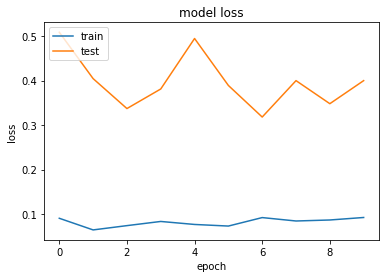

In [106]:
#loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

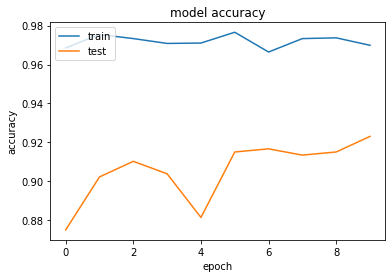

In [107]:
#accuracy graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

**SAVING MODEL IN HDF5 FORMAT**

In [20]:
model.save('MODEL.h5')